In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydicom

import torch
import torchvision

import config as cfg
import preprocess
import data_loader
import utils

### Preprocessing

In [16]:
slices = preprocess.create_dataset(cfg.PATIENT_LIST_FPATH)

PatientId SCD0000301
SliceId 100
ImagePosition ['-8.57014', '-220.813', '98.1765']
ImageOrientation ['0.712221', '0.701112', '-0.0343949', '-0.307716', '0.267798', '-0.913015']
SliceLocation 61.56900024
PercentSampling 100
PixelSpacing ['1.2891', '1.2891']


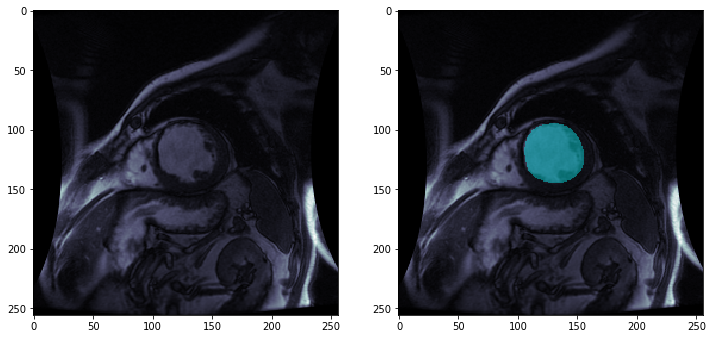

PatientId SCD0000301
SliceId 160
ImagePosition ['6.57168', '-236.674', '88.4211']
ImageOrientation ['0.712221', '0.701112', '-0.0343949', '-0.307715', '0.267798', '-0.913015']
SliceLocation 77.42955017
PercentSampling 100
PixelSpacing ['1.2891', '1.2891']


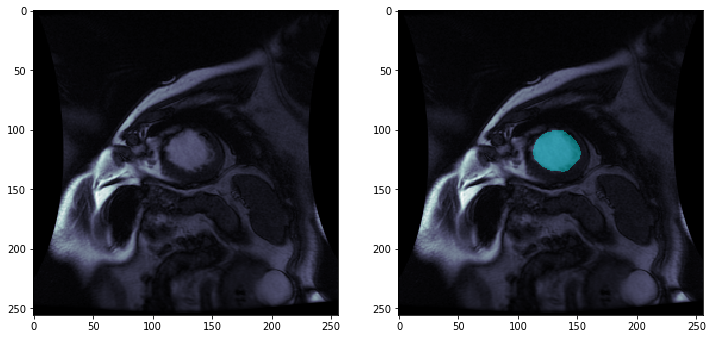

PatientId SCD0000501
SliceId 19
ImagePosition ['-78.897', '-235.753', '162.683']
ImageOrientation ['0.86582', '0.489217', '0.104985', '-0.180977', '0.501761', '-0.845862']
SliceLocation 63.01133728
PercentSampling 100
PixelSpacing ['1.3672', '1.3672']


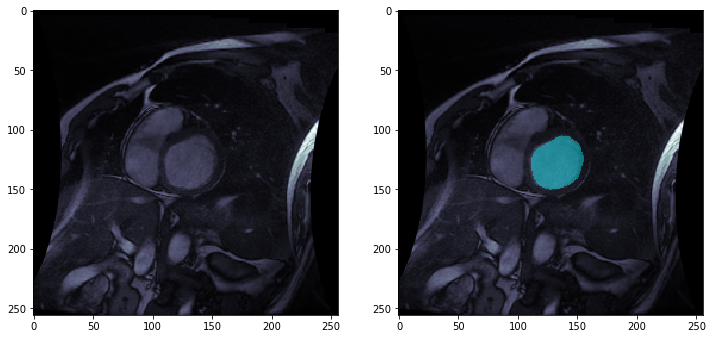

PatientId SCD0000101
SliceId 68
ImagePosition ['182.831', '15.6245', '134.769']
ImageOrientation ['-0.104592', '0.346381', '-0.932245', '-0.733192', '-0.660188', '-0.163037']
SliceLocation -36.792
PercentSampling 71.42857
PixelSpacing ['1.367188', '1.367188']


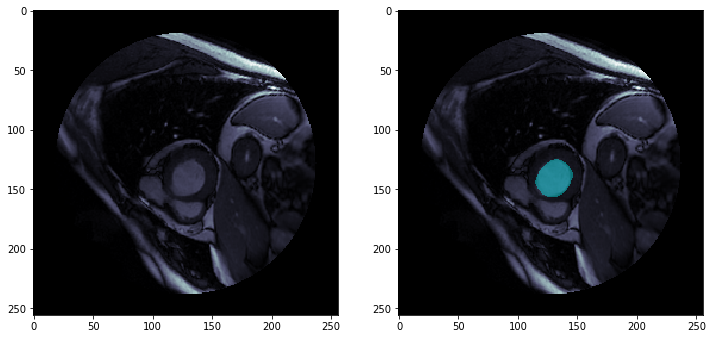

PatientId SCD0000201
SliceId 207
ImagePosition ['-36.358', '-278.338', '100.789']
ImageOrientation ['0.77038', '0.618446', '0.155046', '-0.15161', '0.41389', '-0.897613']
SliceLocation 98.385
PercentSampling 71.42857
PixelSpacing ['1.367188', '1.367188']


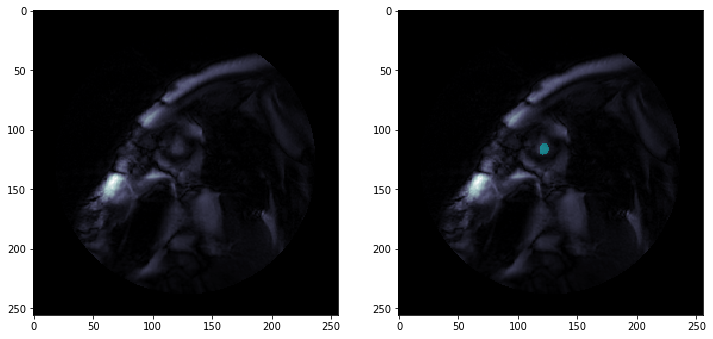

PatientId SCD0000401
SliceId 167
ImagePosition ['-39.6494', '-242.978', '84.155']
ImageOrientation ['0.693252', '0.673689', '0.256017', '0.0220038', '0.335277', '-0.941863']
SliceLocation -85.03259277
PercentSampling 100
PixelSpacing ['1.3672', '1.3672']


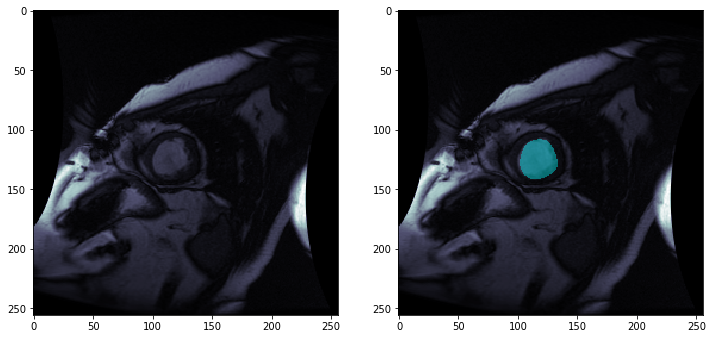

In [19]:
utils.plot_dataset(slices, limit=6)

### Data Loader

In [13]:
img_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])    
mask_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])
dataset = data_loader.SliceDataset(slices, img_transform, mask_transform)
loader = data_loader.get_dataloader(dataset, batch_size=16, shuffle=True)

Patient_Slice: SCD0000201_87


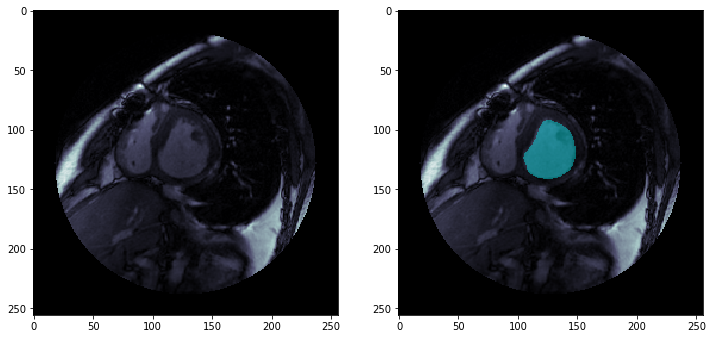

Patient_Slice: SCD0000201_207


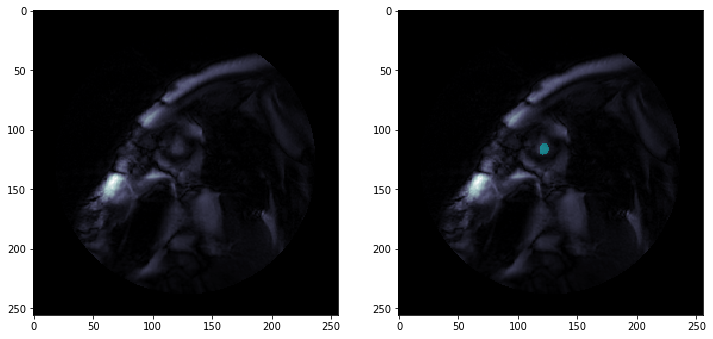

Patient_Slice: SCD0000201_107


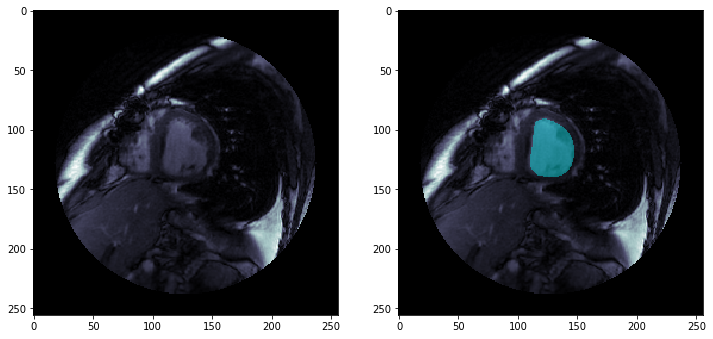

Patient_Slice: SCD0000401_167


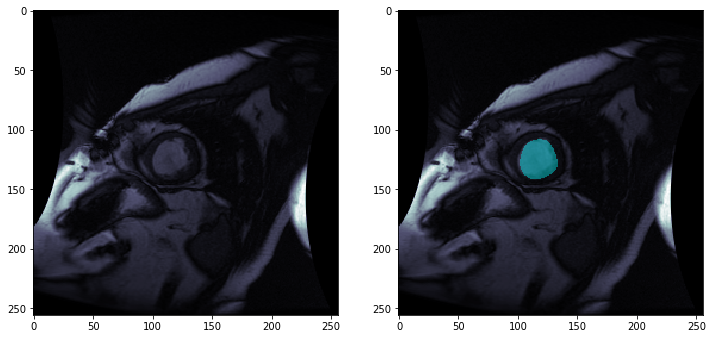

Patient_Slice: SCD0000401_200


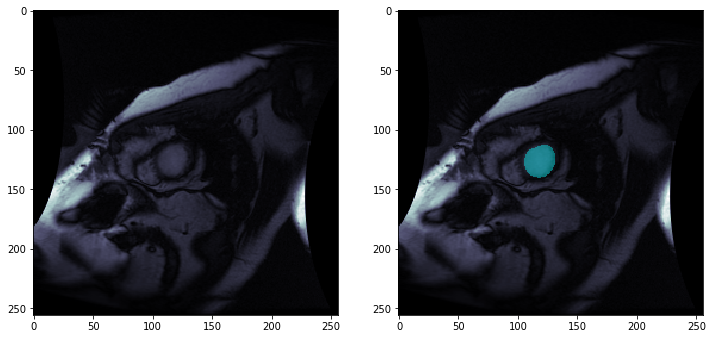

Patient_Slice: SCD0000401_140


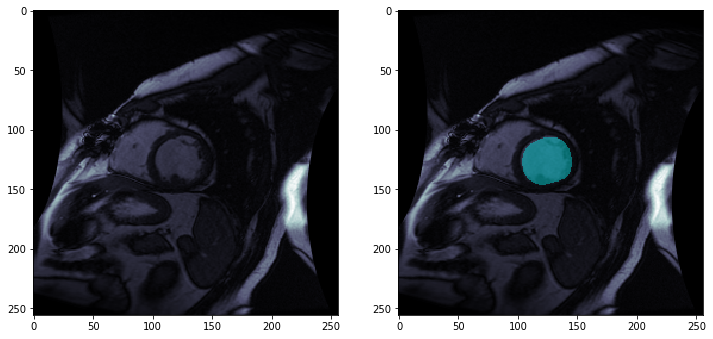

In [14]:
for inputs,targets,info in loader:
    print("Patient_Slice:", info[0])
    arr = inputs[0].numpy().transpose(1,2,0)
    mask = targets[0].numpy().transpose(1,2,0)
    utils.plot_mask_overlay(arr, mask)